# PARTIE II : Gestion simplifiée des collisions


La <b>gestion des collisions</b> est primordiale dans tout jeu vidéo. Elle permet de mener des actions comme par exemple :
- Attaquer un monstre.
- Faire rebondir une balle sur une raquette.
- Empêcher un joueur de traverser une rivière, fossé dans un souci de réalisme.
- De contrôler certains mouvements (on ne peut pas traverser un mur par exemple).
- D'interagir sur le jeu : un clic de souris par exemple sur un monstre.

On étudiera ici deux types simples de collision : par contrôle de distance (cercles) et par bounding box (rectangles).
Voici un lien très bien fait et utile pour la mise en programmation : https://jeux.developpez.com/tutoriels/theorie-des-collisions/formes-2d-simples/. Ce site a servi de <u>ressources</u> pour cette activité.

## <u>Activité 1</u> : un contrôle par distance entre centres



Une première idée est d'<b>associer tout objet à un disque d'un certain rayon</b>. Ainsi, si les centres de chaque objet sont distants de moins de la somme du rayon du chaque disque, alors il y a collision.

Très utile dans certains jeux type <i>"billard"</i> ou <i>"baballon"</i>.
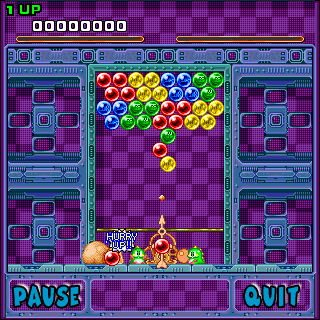




<u>Exemple</u> : On considère un balle représentée par un centre <i>A(x_a;y_a)</i> et de rayon <i>R1</i> et un ballon représenté par un centre <i>B(x_b;y_b)</i> et de rayon <i>R2</i>. Il y a <b>collision</b> si <b> (x_a - x_b)² + (y_a - y_b)² 
<= (R1 + R2)² </b> : il s'agit de la distance <b>euclidienne</b> (vue en NSI Première, lien ici : https://github.com/lmayer65/NSI_T/blob/main/Programme_NSI_1/Algorithmes/AGR.Plus.Proches.Voisins.pdf (page 2) )
    
    
<u>A noter</u> : On peut comparer par rapport à la somme des rayons au carré, cela évite l'utilisation d'une racine carrée qui est coûteuse en temps.
 
<u>Rappel</u> : il s'agit d'une application de la distance euclidienne.

1/ <b>Ecrire</b> une <b>classe</b> `Cercle` avec les attributs nécessaires.

2/ <b>Ecrire</b> une <b>fonction</b> `collision_cercle` ayant <i>cercle1</i> et <i>cercle2</i> comme paramètres permettant de déterminer par un booléen si les deux cercles se coupent ou pas.

In [ ]:
########################### Ecrire la classe ICI ####################################
class Cercle :
    
    
    
########################### Ecrire la fonction ICI ##################################
def collision_cercle(cercle1, cercle2) :
    

3/ <b>Vérifier</b> à l'aide du <u>jeu de tests</u> suivant que tout fonctionne.

In [ ]:
c1 = Cercle(2,-2,3)  # Coordonnées du centre (2,-2) et rayon 3
c2 = Cercle(1,1.5,2) # Coordonnées du centre (1,1.5) et rayon 2
c3 = Cercle(-3,-4,1) # Coordonnées du centre (-3,-4) et rayon 1

print(collision_cercle(c1,c2))  # Attendu : True
print(collision_cercle(c1,c3))  # Attendu : False

### <u>Appel au professeur</u> pour vérification.

## <u>Activité 2</u> : un contrôle par bounding box

L'assimilation d'un objet en disque est une méthode très efficace mais adaptée seulement à des formes rondes. Dans les autres cas, cela ne sera pas réaliste (on peut citer le cas d'un mur par exemple).

Tout d'abord, définissons une <b>Axis Aligned Bounding Box (AABB)</b>. Il s'agit d'un rectangle aligné avec les axes, c'est-à-dire que ses côtés sont parallèles aux axes des x et des y de votre repère (de votre écran pour les cas standard).
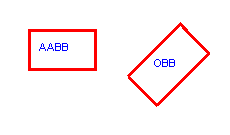

À la différence d'une <b>Oriented Bounding Box (OBB)</b>, qui est un rectangle qui peut être orienté : ses côtés ne sont pas obligatoirement parallèles aux axes de votre repère.

Une AABB peut être définie par quatre paramètres : la <b>position x,y de son coin supérieur gauche</b> (en 2D, l'axe Y va vers le bas). Ainsi que de sa <b>largeur</b> w (comme width) et sa <b>hauteur</b> h (comme height).
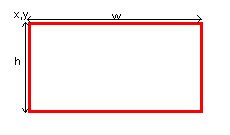

Ce type de collision cherche donc à savoir si un point (de coordonnées x,y) est dans une AABB ou non.
Dans quel cas utilise-t-on ce type de collision ?
Par exemple pour un jeu de tir comme Opération Wolf :
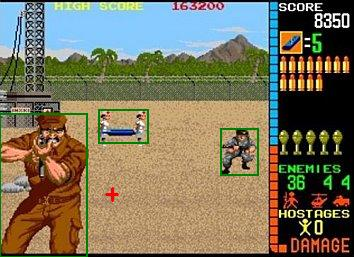

ou pour choisir un item dans un menu (World of Warcraft) :
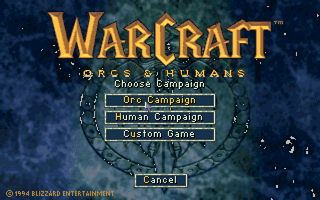


### <u>Collision d'un point et d'un rectangle</u>

1/ <b>Ecrire</b> une classe `Point` avec comme attributs ses <i>coordonnées</i>.

2/ <b>Ecrire</b> une classe `Rect` avec comme attributs celles d'une <i>AABB</i> (voir plus haut).

3/ <b>Ecrire</b> une <b>fonction</b> `point_dans_rect` ayant un <i>objet Point</i> et un <i>objet Rect</i> comme paramètres permettant de déterminer par un booléen si le point est dans le rectangle.

In [ ]:
#################### Ecrire la classe `Point` ICI ####################
class Point :
    

    
    
#################### Ecrire la classe `Rectangle` ICI ####################
class Rectangle :
    
    

#################### Ecrire la fonction `point_dans_rect` ICI ####################
def point_dans_rect(point,rect) :
    
    
    

4/ <b>Vérifier</b> à l'aide du <u>jeu de tests</u> suivant que tout fonctionne.

In [ ]:
p1 = Point(2,3)  # Coordonnées de p1
p2 = Point(10,8) # Coordonnées de p2
p2 = Point(10,3) # Coordonnées de p3
b1 = Rect(4,5,10,5)   # Point supérieur gauche de b1 de coordonnées (4,5), largeur 10 et hauteur 5 de b1

print(point_dans_rect(p1,b1))    # Attendu : False
print(point_dans_rect(p2,b1))    # Attendu : True
print(point_dans_rect(p3,b1))    # Attendu : False

### <u>Appel au professeur</u> pour vérification.

### <u>Collision de deux AABB</u>

Comme indiqué en exemple, chaque objet peut être représenté par un AABB. Il s'agit maintenant de déterminer quelles conditions sont nécessaires pour que deux AABB se touchent.
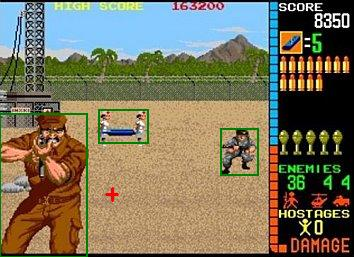

5/ (*) <b>Ecrire</b> une <b>fonction</b> `rect_dans_rect` ayant deux <i>objet Rect</i> comme paramètres permettant de déterminer par un booléen si les rectangles s'enchevêtrent ou pas.

In [ ]:
################### Ecrire la fonction `rect_dans_rect` ICI ###################
def rect_dans_rect(rect1,rect2) :
    
    
    

<b>Vérifier</b> à l'aide du <u>jeu de tests</u> suivant que tout fonctionne.

In [ ]:
b2 = Rect(4,5,5,3)
b3 = Rect(2,3,3,2)
b4 = Rect(10,1,4,2)

print(rect_dans_rect(b2,b3))   # Attendu : True
print(rect_dans_rect(b3,b2))   # Attendu : True
print(rect_dans_rect(b2,b4))   # Attendu : False
print(rect_dans_rect(b4,b2))   # Attendu : False

# Plus difficile
b5 = Rect(1,4,3,2)      
b6 = Rect(2,3.5,1.5,1)  

print(rect_dans_rect(b5,b6))   # Attendu : True
print(rect_dans_rect(b6,b5))   # Attendu : True

<u>Remarque</u> : ne pas hésiter à représenter ces rectangles dans un repère orthonormé. 

### <u>Appel au professeur</u> pour vérification.

6/ (*) Une autre méthode est de déterminer les cas où il n'y a pas collision (on renvoie `False`). Si les tests ne sont pas vérifiés, on renvoie `True`.
<b>Compléter</b> la <b>fonction</b> `rect_dans_rect_2` ayant deux <i>objet Rect</i> comme paramètres permettant de déterminer par un booléen si les rectangles s'enchevêtrent ou pas.

In [ ]:
################### Compléter la fonction `rect_dans_rect_2` ICI ###################
def rect_dans_rect_2(rect1,rect2) :
    if     :                    # A compléter
        return False
    
    return True

<b>Vérifier</b> à l'aide du <u>jeu de tests</u> suivant que tout fonctionne.

In [ ]:
print(rect_dans_rect_2(b2,b3))   # Attendu : True
print(rect_dans_rect_2(b3,b2))   # Attendu : True
print(rect_dans_rect_2(b2,b4))   # Attendu : False
print(rect_dans_rect_2(b4,b2))   # Attendu : False

print(rect_dans_rect_2(b5,b6))   # Attendu : True
print(rect_dans_rect_2(b6,b5))   # Attendu : True

<u>Remarque</u> : ne pas hésiter à représenter ces rectangles dans un repère orthonormé. 

### <u>Appel au professeur</u> pour vérification.